# 主成分分析

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 訓練データ生成

In [2]:
mean = [0, 0]
cov = [[2, 0.7], [0.7, 1]]
X = np.random.multivariate_normal(mean, cov, 200)

(-5, 5)

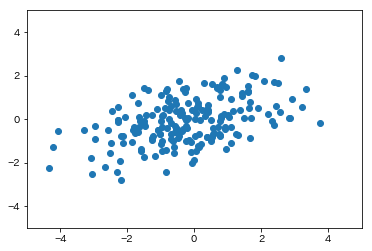

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

## 学習

訓練データ$X = [\boldsymbol{x}_{1}, \boldsymbol{x}_{2}, ..., \boldsymbol{x}_{n}]^{\mathrm{T}}$に対して$\mathbb{E}[\boldsymbol{x}] = \boldsymbol{0}$となるように変換する。

すると、不偏共分散行列は$Var[\boldsymbol{x}] = \frac{1}{n-1} X^{\mathrm{T}}X$と書ける。

$Var[\boldsymbol{x}]$を固有値分解し、固有値の大きい順に対応する固有ベクトルを第1主成分($\boldsymbol{w}_{1}$), 第2主成分($\boldsymbol{w}_{2}$), ...とよぶ。

In [4]:
n_components=2

mean = X.mean(axis=0)

# cov = np.cov(X - mean, rowvar=False)
cov = np.dot((X - mean).T, X - mean) / (len(X) - 1)
eigenvalues, eigenvectors = np.linalg.eigh(cov)
W = eigenvectors[:, ::-1][:, :n_components]

principal_components = W.T

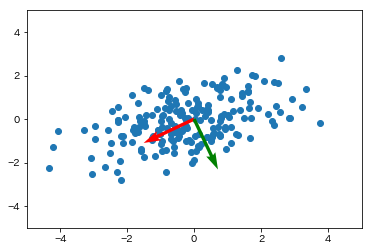

In [5]:
first, second = principal_components

plt.scatter(X[:, 0], X[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
# 第１主成分
plt.quiver(0, 0, first[0], first[1], width=0.01, scale=6, color='red')
# 第２主成分
plt.quiver(0, 0, second[0], second[1], width=0.01, scale=6, color='green')

## 変換（射影）

元のデータを$m$次元に変換(射影)するときは行列$W$を$W=[\boldsymbol{w}_{1}, \boldsymbol{w}_{2}, \cdots, \boldsymbol{w}_{m}]$とし、データ点$\boldsymbol{x}$を$\boldsymbol{z} = W^{\mathrm{T}} \boldsymbol{x}$によって変換(射影)する。

よって、データ$X$に対しては$Z = X^{\mathrm{T}}W$によって変換する。

In [6]:
Z = np.dot(X - mean, W)

(-5, 5)

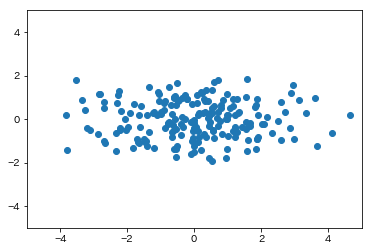

In [7]:
plt.scatter(Z[:, 0], Z[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

## 逆変換

射影されたデータ点$\boldsymbol{z}$を元のデータ空間へ逆変換するときは$\bar{\boldsymbol{x}} = (W^{\mathrm{T}})^{-1} \boldsymbol{z} = W \boldsymbol{z}$によって変換する。

よって、射影されたデータ$Z$に対しては$\bar{X} = ZW^{\mathrm{T}}$によって変換する。

In [8]:
X_ = np.dot(Z, W.T) + mean

(-5, 5)

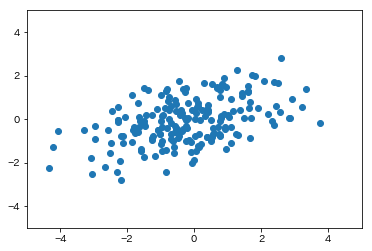

In [9]:
plt.scatter(X_[:, 0], X_[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)